In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("hello")

In [ ]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install pdf2image pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.7 MB/s eta 0:00:00


In [ ]:
pip install pdf2image pytesseract opencv-python-headless


In [ ]:
pip install PyPDF2 pdf2image transformers sentence-transformers pinecone-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.6 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install -y poppler-utils poppler-data

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,564 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Hit:13 https://ppa.launchpadcontent.net/

In [ ]:
!apt update
!apt install tesseract-ocr -y
!pip install pytesseract


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
50 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
import pytesseract

# Point pytesseract to the installed Tesseract-OCR executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


In [ ]:
!apt update
!apt install tesseract-ocr -y
!pip install pytesseract

import os
import time
import json
from pdf2image import convert_from_path
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer
from concurrent.futures import ThreadPoolExecutor, as_completed

# Timing the process
start_time = time.time()

# File paths
file_path = "/content/drive/MyDrive/Interview/PDF Documents/Test.pdf"
output_dir = '/content/drive/MyDrive/Interview/Extracted Text'
os.makedirs(output_dir, exist_ok=True)

# Specify Tesseract-OCR path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

result = {"text": "", "bag_of_words": {}}

def process_page_as_text(page_index, image):
    extracted_text = pytesseract.image_to_string(image)
    return extracted_text

images = convert_from_path(file_path)
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_page_as_text, i, img) for i, img in enumerate(images)]
    for future in as_completed(futures):
        extracted_text = future.result()
        result["text"] += extracted_text + "\n"

vectorizer = CountVectorizer()
text_corpus = [result["text"]]
bow_matrix = vectorizer.fit_transform(text_corpus)

# Convert `numpy.int64` to Python `int`
word_frequencies = {k: int(v) for k, v in zip(vectorizer.get_feature_names_out(), bow_matrix.toarray()[0])}
result["bag_of_words"] = word_frequencies

end_time = time.time()
result["processing_time"] = f"{end_time - start_time:.2f} seconds"

output_json = json.dumps(result, indent=4)
print("Output JSON:")
print(output_json)


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
50 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
import os  # For file and directory operations.
import time  # For measuring script execution time.
import json  # For structuring and exporting the output.
from pdf2image import convert_from_path  # To convert PDF pages to images.
import pytesseract  # For Optical Character Recognition (OCR).
from sklearn.feature_extraction.text import CountVectorizer  # For Bag of Words.
from concurrent.futures import ThreadPoolExecutor, as_completed  # For parallel processing.

# Timing the process
start_time = time.time()

# File paths
file_path = "/content/drive/MyDrive/Interview/PDF Documents/Test.pdf"  # Input PDF file path
output_dir = '/content/drive/MyDrive/Interview/Extracted Text'  # Output directory for text results
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Initialize result structure
result = {"text": "", "bag_of_words": {}}  # To store extracted text and word frequencies

# Step 1: Extract text from PDF pages
def process_page_as_text(page_index, image):
    """
    Function to process a single page image and extract text using OCR.
    :param page_index: Index of the page
    :param image: PIL image object
    :return: Extracted text
    """
    extracted_text = pytesseract.image_to_string(image)  # Extract text using Tesseract OCR
    return extracted_text  # Return the text extracted

# Convert all PDF pages to images using pdf2image
images = convert_from_path(file_path)
with ThreadPoolExecutor() as executor:  # Use ThreadPoolExecutor for parallel processing
    futures = [executor.submit(process_page_as_text, i, img) for i, img in enumerate(images)]  # Process each image asynchronously
    for future in as_completed(futures):  # Wait for all futures to complete
        extracted_text = future.result()  # Get results from each future
        result["text"] += extracted_text + "\n"  # Append extracted text to result

# Step 2: Perform Bag of Words analysis
vectorizer = CountVectorizer()  # Initialize CountVectorizer
text_corpus = [result["text"]]  # Create a corpus with the extracted text
bow_matrix = vectorizer.fit_transform(text_corpus)  # Fit and transform text to BoW

# Create a dictionary of word frequencies with conversion to int
word_frequencies = {word: int(freq) for word, freq in zip(vectorizer.get_feature_names_out(), bow_matrix.toarray()[0])}
result["bag_of_words"] = word_frequencies  # Store word frequencies in result

# Timing end
end_time = time.time()
result["processing_time"] = f"{end_time - start_time:.2f} seconds"  # Record processing time

# Output the result as JSON
output_json = json.dumps(result, indent=4)  # Format the result as JSON
print("Output JSON:")
print(output_json)  # Print the JSON with extracted text and word frequencies


Output JSON:
{
    "text": "velit. Nam hendrerit sem tempor imperdiet. porttitor. Vestibulum ante ipsum\nprimis in faucibus orci luctus et ultrices posuere cubilia curae; Mauris rhoncus\nconvallis turpis, in lobortis tellus elementum in. Proin at cursus dui. Aliquam\ndictum nunc dolor, ut convallis tellus porta eu. Morbi sit amet dui dolor.\n\f\nLorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam tempor purus a\ncongue ullamcorper. Nunc vulputate eros nunc, sed molestie orci interdum ut.\nMauris non tristique neque, ut tincidunt lectus. Nunc sollicitudin eros sapien.\nDonec metus ex, vestibulum vel pharetra in, convallis id diam. Sed eu tellus\npulvinar, fringilla est ut, feugiat nibh. Etiam eget commodo risus. Proin faucibus\nelementum enim, ut hendrerit nisi convallis at. Pellentesque volutpat, purus\nfaucibus varius tincidunt, nulla erat\n\n \n\nconvallis lacus, eu accumsan felis mauris eget velit. Vestibulum a neque purus.\nVestibulum in ultricies justo. Fusce dapibus,

In [ ]:
import os  # For file and directory operations.
import time  # For measuring script execution time.
import json  # For structuring and exporting the output.
from pdf2image import convert_from_path  # To convert PDF pages to images.
import pytesseract  # For Optical Character Recognition (OCR).
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For BoW and TF-IDF.
from concurrent.futures import ThreadPoolExecutor, as_completed  # For parallel processing.

# Timing the process
start_time = time.time()

# File paths
file_path = "/content/drive/MyDrive/Interview/PDF Documents/Test.pdf"  # Input PDF file path
output_dir = '/content/drive/MyDrive/Interview/Extracted Text'  # Output directory for text results
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Initialize result structure
result = {"text": "", "bag_of_words": {}, "tf_idf": {}}  # To store extracted text, BoW, and TF-IDF results

# Step 1: Extract text from PDF pages
def process_page_as_text(page_index, image):
    """
    Function to process a single page image and extract text using OCR.
    :param page_index: Index of the page
    :param image: PIL image object
    :return: Extracted text
    """
    extracted_text = pytesseract.image_to_string(image)  # Extract text using Tesseract OCR
    return extracted_text  # Return the text extracted

# Convert all PDF pages to images using pdf2image
images = convert_from_path(file_path)
with ThreadPoolExecutor() as executor:  # Use ThreadPoolExecutor for parallel processing
    futures = [executor.submit(process_page_as_text, i, img) for i, img in enumerate(images)]  # Process each image asynchronously
    for future in as_completed(futures):  # Wait for all futures to complete
        extracted_text = future.result()  # Get results from each future
        result["text"] += extracted_text + "\n"  # Append extracted text to result

# Step 2: Perform Bag of Words (BoW) analysis
vectorizer_bow = CountVectorizer()  # Initialize CountVectorizer for BoW
text_corpus = [result["text"]]  # Create a corpus with the extracted text
bow_matrix = vectorizer_bow.fit_transform(text_corpus)  # Fit and transform text to BoW

# Create a dictionary of word frequencies with conversion to int
word_frequencies_bow = {word: int(freq) for word, freq in zip(vectorizer_bow.get_feature_names_out(), bow_matrix.toarray()[0])}
result["bag_of_words"] = word_frequencies_bow  # Store word frequencies in result

# Step 3: Perform TF-IDF analysis
vectorizer_tfidf = TfidfVectorizer()  # Initialize TfidfVectorizer for TF-IDF
tfidf_matrix = vectorizer_tfidf.fit_transform(text_corpus)  # Fit and transform text to TF-IDF

# Create a dictionary of TF-IDF scores
tfidf_scores = {word: round(float(score), 4) for word, score in zip(vectorizer_tfidf.get_feature_names_out(), tfidf_matrix.toarray()[0])}
result["tf_idf"] = tfidf_scores  # Store TF-IDF scores in result

# Timing end
end_time = time.time()
result["processing_time"] = f"{end_time - start_time:.2f} seconds"  # Record processing time

# Output the result as JSON
output_json = json.dumps(result, indent=4)  # Format the result as JSON
print("Output JSON:")
print(output_json)  # Print the JSON with extracted text, BoW, and TF-IDF results


Output JSON:
{
    "text": "velit. Nam hendrerit sem tempor imperdiet. porttitor. Vestibulum ante ipsum\nprimis in faucibus orci luctus et ultrices posuere cubilia curae; Mauris rhoncus\nconvallis turpis, in lobortis tellus elementum in. Proin at cursus dui. Aliquam\ndictum nunc dolor, ut convallis tellus porta eu. Morbi sit amet dui dolor.\n\f\nLorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam tempor purus a\ncongue ullamcorper. Nunc vulputate eros nunc, sed molestie orci interdum ut.\nMauris non tristique neque, ut tincidunt lectus. Nunc sollicitudin eros sapien.\nDonec metus ex, vestibulum vel pharetra in, convallis id diam. Sed eu tellus\npulvinar, fringilla est ut, feugiat nibh. Etiam eget commodo risus. Proin faucibus\nelementum enim, ut hendrerit nisi convallis at. Pellentesque volutpat, purus\nfaucibus varius tincidunt, nulla erat\n\n \n\nconvallis lacus, eu accumsan felis mauris eget velit. Vestibulum a neque purus.\nVestibulum in ultricies justo. Fusce dapibus,

Converting PDF to images...


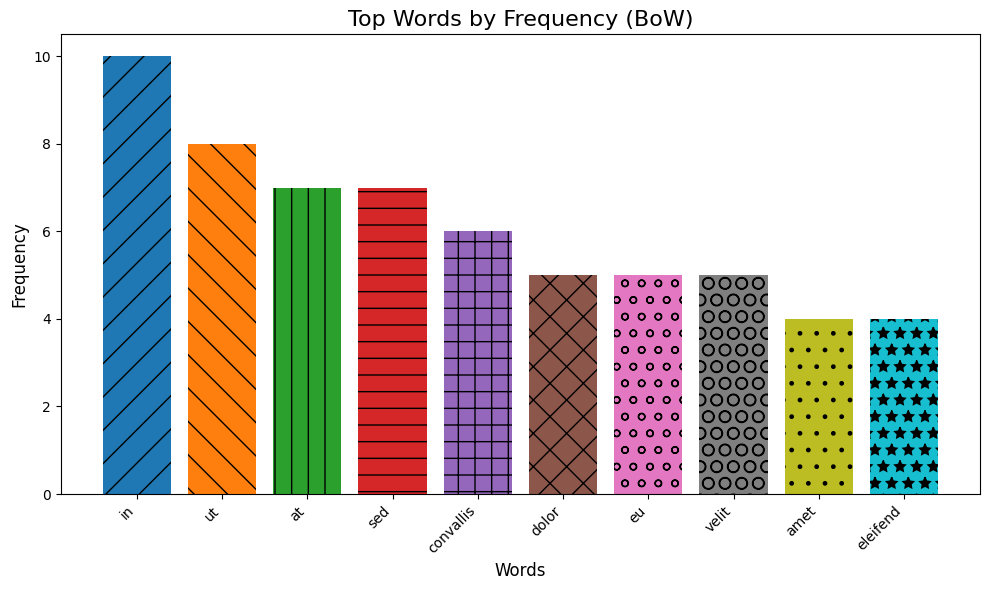

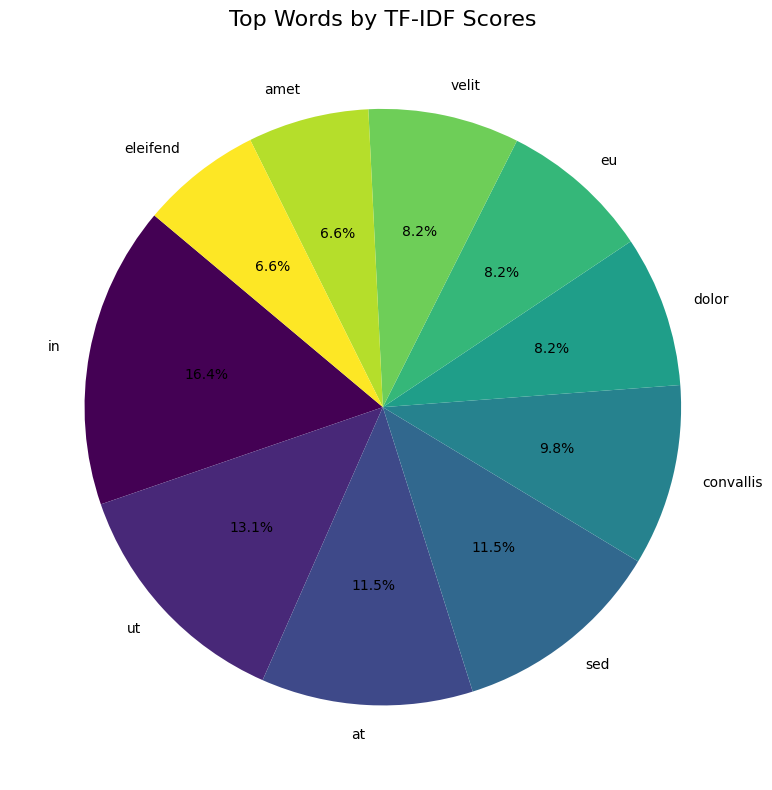

Processing completed in 12.79 seconds


In [ ]:
import os
import time
from pdf2image import convert_from_path
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt
import numpy as np

# Timing the process
start_time = time.time()

# File paths
file_path = "/content/drive/MyDrive/Interview/PDF Documents/Test.pdf"  # Input PDF file path

# Step 1: Extract text from PDF pages
def process_page_as_text(page_index, image):
    """
    Function to process a single page image and extract text using OCR.
    :param page_index: Index of the page
    :param image: PIL image object
    :return: Extracted text
    """
    extracted_text = pytesseract.image_to_string(image)  # Extract text using Tesseract OCR
    return extracted_text  # Return the text extracted

# Convert all PDF pages to images using pdf2image
print("Converting PDF to images...")
images = convert_from_path(file_path)
text = ""
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_page_as_text, i, img) for i, img in enumerate(images)]
    for future in as_completed(futures):
        extracted_text = future.result()
        text += extracted_text + "\n"

# Step 2: Perform BoW analysis
vectorizer_bow = CountVectorizer()
text_corpus = [text]
bow_matrix = vectorizer_bow.fit_transform(text_corpus)

# Create a dictionary of word frequencies
word_frequencies_bow = {word: int(freq) for word, freq in zip(vectorizer_bow.get_feature_names_out(), bow_matrix.toarray()[0])}

# Step 3: Perform TF-IDF analysis
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(text_corpus)

# Create a dictionary of TF-IDF scores
tfidf_scores = {word: round(float(score), 4) for word, score in zip(vectorizer_tfidf.get_feature_names_out(), tfidf_matrix.toarray()[0])}

# Step 4: Visualize BoW as a bar chart
def plot_bow_bar_chart(data, top_n=10):
    """
    Function to plot BoW data as a bar chart with patterns.
    :param data: Dictionary of words and their frequencies.
    :param top_n: Number of top words to display.
    """
    # Sort and select top_n words
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n]
    words, frequencies = zip(*sorted_data)

    # Define colors and patterns
    colors = plt.cm.tab10.colors
    patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = plt.bar(words, frequencies, color=colors[:len(words)])
    for bar, pattern in zip(bars, patterns[:len(words)]):
        bar.set_hatch(pattern)
    plt.title("Top Words by Frequency (BoW)", fontsize=16)
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Step 5: Visualize TF-IDF as a circular chart
def plot_tfidf_pie_chart(data, top_n=10):
    """
    Function to plot TF-IDF data as a pie chart.
    :param data: Dictionary of words and their TF-IDF scores.
    :param top_n: Number of top words to display.
    """
    # Sort and select top_n words
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n]
    words, scores = zip(*sorted_data)

    # Define colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.pie(scores, labels=words, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Top Words by TF-IDF Scores", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot BoW and TF-IDF
plot_bow_bar_chart(word_frequencies_bow, top_n=10)
plot_tfidf_pie_chart(tfidf_scores, top_n=10)

# Timing end
end_time = time.time()
print(f"Processing completed in {end_time - start_time:.2f} seconds")


Converting PDF to images...


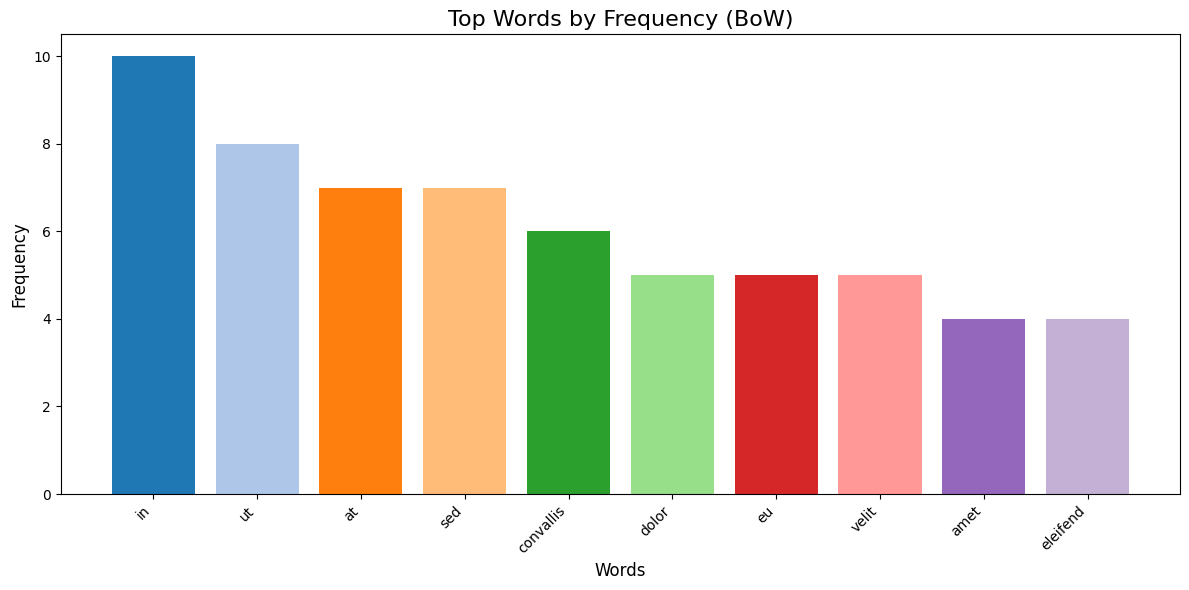

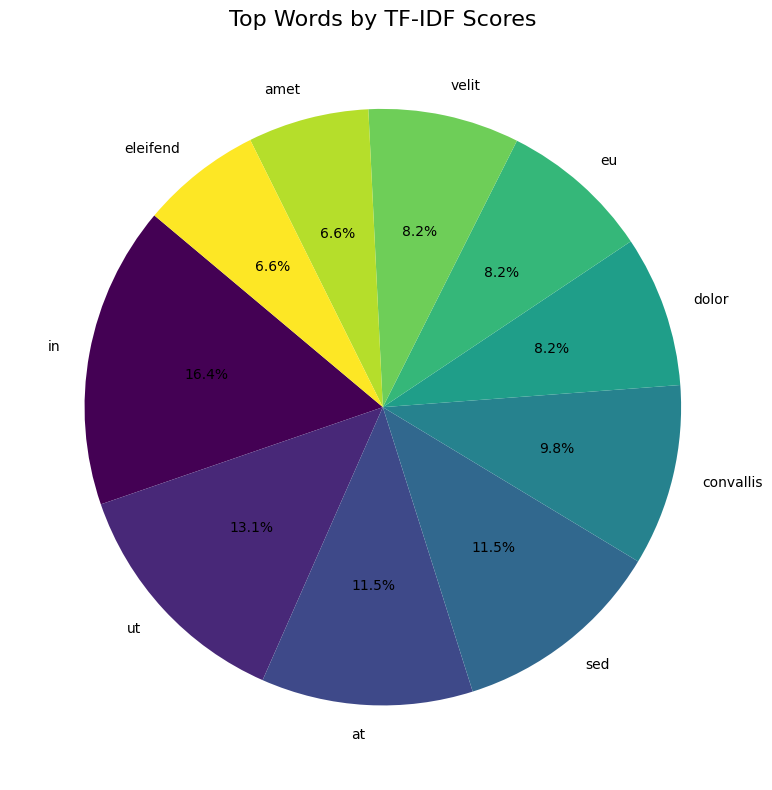

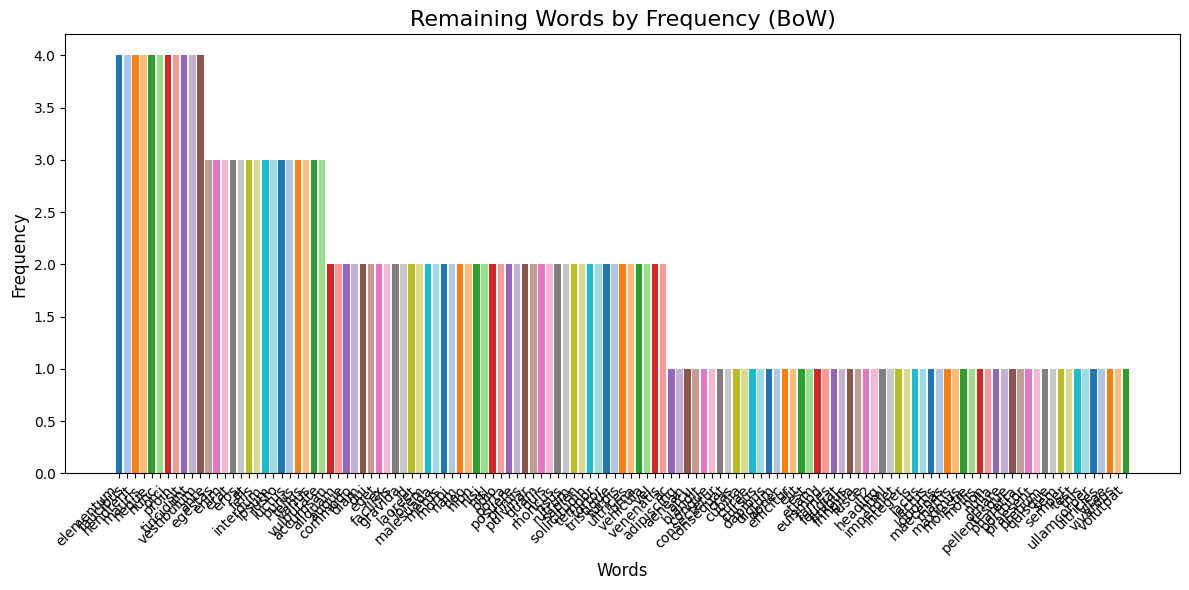

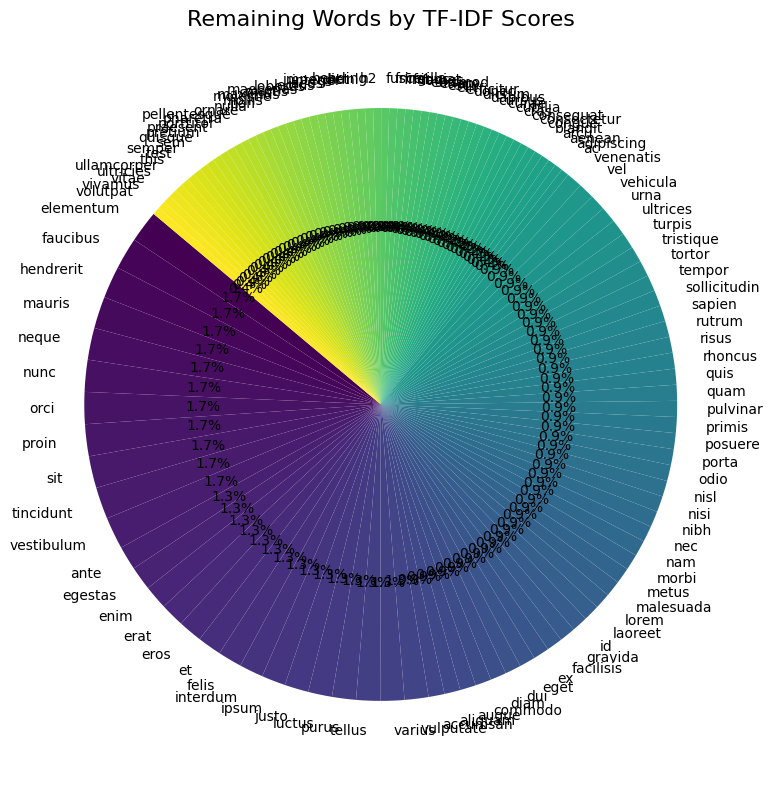

Processing completed in 13.59 seconds


In [ ]:
import os
import time
from pdf2image import convert_from_path
import pytesseract
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt
import numpy as np

# Timing the process
start_time = time.time()

# File paths
file_path = "/content/drive/MyDrive/Interview/PDF Documents/Test.pdf"  # Input PDF file path

# Step 1: Extract text from PDF pages
def process_page_as_text(page_index, image):
    """
    Function to process a single page image and extract text using OCR.
    :param page_index: Index of the page
    :param image: PIL image object
    :return: Extracted text
    """
    extracted_text = pytesseract.image_to_string(image)  # Extract text using Tesseract OCR
    return extracted_text  # Return the text extracted

# Convert all PDF pages to images using pdf2image
print("Converting PDF to images...")
images = convert_from_path(file_path)
text = ""
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_page_as_text, i, img) for i, img in enumerate(images)]
    for future in as_completed(futures):
        extracted_text = future.result()
        text += extracted_text + "\n"

# Step 2: Perform BoW analysis
vectorizer_bow = CountVectorizer()
text_corpus = [text]
bow_matrix = vectorizer_bow.fit_transform(text_corpus)

# Create a dictionary of word frequencies
word_frequencies_bow = {word: int(freq) for word, freq in zip(vectorizer_bow.get_feature_names_out(), bow_matrix.toarray()[0])}

# Step 3: Perform TF-IDF analysis
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(text_corpus)

# Create a dictionary of TF-IDF scores
tfidf_scores = {word: round(float(score), 4) for word, score in zip(vectorizer_tfidf.get_feature_names_out(), tfidf_matrix.toarray()[0])}

# Step 4: Visualize BoW and TF-IDF
def plot_bow_bar_chart(data, title, top_n=None):
    """
    Function to plot BoW data as a bar chart.
    :param data: Dictionary of words and their frequencies.
    :param title: Title of the chart.
    :param top_n: Number of top words to display. If None, display all.
    """
    # Sort and optionally select top_n words
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    if top_n:
        sorted_data, remaining_data = sorted_data[:top_n], sorted_data[top_n:]
    else:
        remaining_data = []
    words, frequencies = zip(*sorted_data)

    # Define colors
    colors = plt.cm.tab20.colors[:len(words)]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies, color=colors)
    plt.title(title, fontsize=16)
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    return remaining_data  # Return remaining words if top_n is used

def plot_tfidf_pie_chart(data, title, top_n=None):
    """
    Function to plot TF-IDF data as a pie chart.
    :param data: Dictionary of words and their TF-IDF scores.
    :param title: Title of the chart.
    :param top_n: Number of top words to display. If None, display all.
    """
    # Sort and optionally select top_n words
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    if top_n:
        sorted_data, remaining_data = sorted_data[:top_n], sorted_data[top_n:]
    else:
        remaining_data = []
    words, scores = zip(*sorted_data)

    # Define colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pie(scores, labels=words, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    return remaining_data  # Return remaining words if top_n is used

# Plot main BoW and TF-IDF
remaining_bow = plot_bow_bar_chart(word_frequencies_bow, "Top Words by Frequency (BoW)", top_n=10)
remaining_tfidf = plot_tfidf_pie_chart(tfidf_scores, "Top Words by TF-IDF Scores", top_n=10)

# Plot remaining BoW and TF-IDF
if remaining_bow:
    plot_bow_bar_chart(dict(remaining_bow), "Remaining Words by Frequency (BoW)")

if remaining_tfidf:
    plot_tfidf_pie_chart(dict(remaining_tfidf), "Remaining Words by TF-IDF Scores")

# Timing end
end_time = time.time()
print(f"Processing completed in {end_time - start_time:.2f} seconds")
